# Image Processing
It is a technique used for the analysis of an image in order to manipulate it and extract information from it.

<img src="data/im1.png" width="600">
<img src="data/im2.PNG" width="600">
<img src="data/im3.png" width="1000">

### What is the purpose of image processing?
- <b>Visualization</b> - Observe the objects that are not visible.
- <b>Image Sharpening and Restoration</b> - To create a better image.
- <b>Image Retrieval</b> - Seek for the image of interest.
- <b>Measurement of Pattern</b> - Measures various objects in an image.
- <b>Image Recognition</b> - Distinguish the objects in an image.

### Python can do this all!
Is there anything that Python can't do. You have to be kidding me!

**OpenCV is a Open-source computer vision** library available for multiple platforms including C++.
But first let's take a sneak peek at code of C++ I used for simplistic image processing task.
<img src="data/c++.PNG" width="2000">

**Too many words, the hell with this shit!**
It literally took me two months to actually learn to code this, with clear concepts of course. Plus it's tedious to set up the libraries and do the required configurations before you can write the actual code. If you do really want to check that out though, I have maintained a journal containing core code concepts for C++ to use with OpenCV.

### Moving forward with Python
Yes, people may claim why Python when much faster language exists that can process images way faster. I ask them, even if it is faster is it faster to debug them or write the code and not get stuck with the grammar of it?

**Disclaimer:** If you are hating C++ right at this instant, Python is built on C++.
***So***
<img src="data/haters.gif" width="500">
***C++ is going nowhere!***

### Installing OpenCV on Python
OpenCV have a pre-compiled solution (pip install opencv-python==3.4.7.28) or you can compile it from source. 

<img src="data/tenor.gif" width="500">

But don't you worry, this site: https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv has the solution. Some people are heavenly and they will go straight to ***Jana'ah***. These people have compiled the package for Windows and provided the complete solution. The download will be a **.whl** file. Choose appropriate version according to your Python version and your processor (32-bit or 64-bit).

Open CMD and go to directory where the downloaded file is present and install in this way:
- pip install "opencv_python‑3.4.3‑cp36‑cp36m‑win_amd64.whl"

### And now let's code
***With few functions always in mind:***
- imread( ***directory*** )
- imshow( image )
- cvtColor( image, ***conversion_from_and_to*** )
- imwrite( ***directory***, image )
- VideoCapture( ***address*** )

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [69]:
# Read the image
im = cv2.imread('samples/1 (1).png')
# Display the original image
cv2.imshow('original',im)
cv2.waitKey(0)

-1

#### Processing the original image
original -> BGR to gray -> resizing -> display

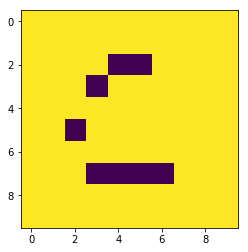

In [67]:
# Let's change the RGB image (or BGR as said in OpenCV) to Grayscale
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
# Now if you want to resize the image to 10x10 
im = cv2.resize(im, (10,10))
# Display the processed image
#cv2.imshow('gray',im)
#cv2.waitKey(0)
plt.imshow(im)

### Print the normalized pixel values
Normalization can be done by dividing the pixel values by the higest number possible which in the case of images in 255.
**Notice how matrix values printed below is exact representation of the image**
- 0 -> Black
- 1 -> White

In [68]:
print(im/255)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


### Compare the image with the pixel values
<img src="data/resC.PNG" width="1000">

### A video is just a collection of images
When a set of 60 images are displayed in a second, a video is born. A 10 second video basically contains 60x10 = 600 images.
In OpenCV you can process the video in a very similar fashion like that of still images.

In [70]:
# Read the video or open the webcam.
cap = cv2.VideoCapture(0)
# Read the first frame, then the second, then the third, and so on.
# You will require a loop that can read new frame in every iteration and display it
while(cap.isOpened()):
    # Read the frame
    _, frame = cap.read()
    cv2.imshow('original',frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('gray', gray)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    cv2.imshow('hsv', hsv)
    
    # In order to end the process or video forcefully, press 'q'
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

# Release the memory. If you don't do this, it will eat up your memory and program will crash ultimately        
cap.release()
# Close all the opened windows because either the video has been finished or you forcefully ended the video
cv2.destroyAllWindows()

***Notice the while block:*** The process taking place in the body is exactly the same as that of the still images.

### Concept Alert!
There is a **don't care variable** in the code above represented by an underscore. Sometimes you don't care about the variable name because they are not used anywhere in the code so you just let Python take care of it and name it anything it want.

In [6]:
_ = 24
print(_)

24


Another thing you might have seen is this:
- a, b = somefunc()

This simply means that if a function returns two values, you can say that first value goes into 'a' and the second goes into 'b'.

In [71]:
def twonum():
    return 2,3

_, b = twonum()
print(b)

3


### Flip the frames
Sometimes during the training of the AI system, the data available is not enough. One way to increase the data is to make small changes to the existing data. This is known as **Data Augmentation**. In case of the images, you can flip them and add these generated images to the dataset.

In [8]:
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame, 0)
        # Flip the frame
        cv2.imshow('frame',frame)
    
        # In order to end the process or video forcefully, press 'q'
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

### Drawing on the images
Very often in **Object Localization** the computer draws a boundary around the image showing you where the object is. 

**For Example:** In the image below, AI system has not only accurately predicted the character but also shows where the character is in the image.
<img src="data/chardata.jpg" width="1000">

### Further examples include
Complex image segmentation and localization, many of which is done by a simple function call in Python.
<img src="data/boundary.png" width="1000">
<img src="data/boundary2.PNG" width="1000">

### With that motivation
Let's learn how the computer draws on the image, shall we? 

In [73]:
# A 2D array of zeros as we saw means the image is black
# The following code is to create a black image of size 100x100
img = np.zeros((500,500,3), np.uint8)

# cv2.line(image, (x_init, y_init), (h, w), (b, g, r), line_width)
img = cv2.line(img, (0,80), (500,80), (255,0,0), 2)
img = cv2.line(img, (0,60), (260,500), (0,255,0), 2)
img = cv2.line(img, (240,500), (500,60), (0,0,255), 2)

# cv2.rectangle(img, (x_2, y_1), (x_1, y_2), (b, g, r), line_width)
img = cv2.rectangle(img, (350,200), (150,300), (255,255,255), 2)

# cv2.circle(img, (x_cen, y_cen), radius, (b, g, r), fill)
img = cv2.circle(img,(250,250), 20, (255,0,255), -1)

# cv2.putText(img, text, (x, y), font, size, (b, g, r), boldness, 0)
cv2.putText(img,'Hello World~', (150,150), 2, 1, (255,255,255), 1, 0)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

### Try drawing these
<img src="data/drawthis.png" width="500">

### Masking
In order to extract a specific color from the image, a concept known as masking is used. This concept can be understood intuitively. Mask is simply the array of pixels which you want to consider only and all the other pixels are turned to zero. 

<img src="data/masking.PNG" width="1000">

**Mask is a Binary Image!**

But now you want to retain the color of the object as well. Therefore, we can apply AND operation on the mask and the original image. The pixels in the mask which were zero will turn the result of AND operation to become zero. Similarly the pixels in the mask which were ones will turn the result of AND operation to be unaffected.

It is better explained by the example below.

In [75]:
img = cv2.imread('samples/C (60).jpg')
im = cv2.resize(img, (500,500))
cv2.imshow('image', im)

# Always convert the image to HSV for masking
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# Define the color you want for mask
lower_red = np.array([100,130,150])
upper_red = np.array([255,255,255])

# Apply the mask
mask = cv2.inRange(hsv, lower_red, upper_red)
cv2.imshow('mask', mask)

# Do the AND operation on mask and original image
res = cv2.bitwise_and(im, im, mask=mask)
cv2.imshow('res', res)

cv2.waitKey(0)
cv2.destroyAllWindows()

### But how to find out the masking values?
Trust me, you have to play with it and test it repeatedly on images containing similar color until you find that sweet spot.

### Wasn't anything not impossible with Python?
So can we not resolve this trial and error thing to find the sweet spot and make an algorithm that makes it easy to do so. **Let's find out!**
### Trackbars for images

In [61]:
img = cv2.imread('samples/1 (3).jpg')
im = cv2.resize(img, (500,500))
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# initialize by making a blank result image
res = np.zeros((500,500,3), np.uint8)

# creating a window on which image will be displayed
cv2.imshow('image', im)

def nothing(x):
    pass

#initializing the values to be set using trackbars to be zero
l_h,l_s,l_v = 0,0,0
higher = 255

# creating trackbars
cv2.createTrackbar('h', 'image', l_h, higher, nothing)
cv2.createTrackbar('s', 'image', l_s, higher, nothing)
cv2.createTrackbar('v', 'image', l_v, higher, nothing)

# with every new value from trackbar, image is needed to be refreshed and redisplayed
while(True):
    cv2.imshow('res', res)
        
    # get the trackbar positions and set them to l_h, l_s, l_v respectively
    l_h = cv2.getTrackbarPos('h', 'image')
    l_s = cv2.getTrackbarPos('s', 'image')
    l_v = cv2.getTrackbarPos('v', 'image')
    
    lower_red = np.array([l_h,l_s,l_v])
    upper_red = np.array([255,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(im, im, mask=mask)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        print("hsv -> ",l_h,l_s,l_v)
        break

# save the image
cv2.imwrite('samples/samples.jpg', res)
cv2.destroyAllWindows()

hsv ->  39 119 135


### Can we make trackbars for video
Sure we can, just a little more code and more copy paste from above!

In [76]:
cap = cv2.VideoCapture(0)

def nothing(x):
    pass

#initializing the values to be set using trackbars to be zero
l_h,l_s,l_v = 0,0,0
higher = 255

# creating trackbars
cv2.namedWindow('image')
cv2.createTrackbar('h', 'image', l_h, higher, nothing)
cv2.createTrackbar('s', 'image', l_s, higher, nothing)
cv2.createTrackbar('v', 'image', l_v, higher, nothing)

while(cap.isOpened()):
    _,frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos('h', 'image')
    l_s = cv2.getTrackbarPos('s', 'image')
    l_v = cv2.getTrackbarPos('v', 'image')
    
    lower_red = np.array([l_h,l_s,l_v])
    upper_red = np.array([255,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('image', frame)
    cv2.imshow('res', res)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        print("hsv -> ",l_h,l_s,l_v)
        break
    
cap.release()
cv2.destroyAllWindows()

hsv ->  54 134 93


### Image Shape
OpenCV gives you a handy facility to know the dimensions of your image.

In [47]:
print("img: ", img.shape)
print("im: ", im.shape)
print("hsv: ", hsv.shape)
print("mask: ", mask.shape)
print("res: ", res.shape)

img:  (194, 259, 3)
im:  (500, 500, 3)
hsv:  (500, 500, 3)
mask:  (500, 500)
res:  (500, 500, 3)


### Fin
<img src="data/done.gif" width="800">